# The Sparks Foundation. #GIRPJUNE21
## Graduate Rotational Internship Program

### Task 6: Prediction using Decision Tree Algorithm (Create the Decision Tree classifier and visualize it graphically.) 
### Name :Suraj Kalunge

In [1]:
import pyforest
df=pd.read_csv('iris.csv')
df.head()

<IPython.core.display.Javascript object>

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


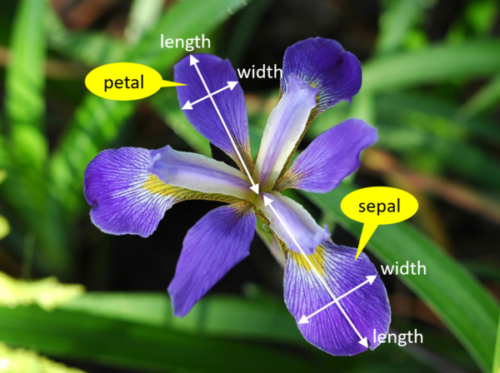

In [2]:
import sklearn.datasets as datasets
data=datasets.load_iris()

In [3]:
data.data.shape

(150, 4)

In [4]:
print('classes to predict:',data.target_names)

classes to predict: ['setosa' 'versicolor' 'virginica']


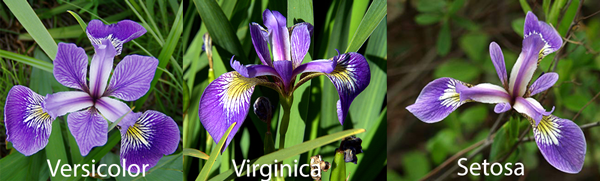

In [5]:
print('Features:',data.feature_names)

Features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [6]:
X= data.data

In [7]:
y =data.target

In [8]:
display(X.shape,y.shape)

(150, 4)

(150,)

In [9]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, 
y, 
test_size = 0.3, 
random_state = 50) 

In [10]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(X_train,y_train)

DecisionTreeClassifier()

In [11]:
y_pred = clf.predict(X_test)

In [12]:
from sklearn.metrics import accuracy_score
print('Accuracy Score on train data (using Default criterionas gini):'
,accuracy_score(y_true=y_train,y_pred=clf.predict(X_train)))
print('Accuracy Score on train data (using Default criterionas gini):'
,accuracy_score(y_true=y_test,y_pred=y_pred))

Accuracy Score on train data (using Default criterionas gini): 1.0
Accuracy Score on train data (using Default criterionas gini): 0.9555555555555556


In [13]:
clf_entropy = DecisionTreeClassifier(criterion='entropy')

In [14]:
clf_entropy.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [15]:
y_pred_entropy = clf_entropy.predict(X_test)

In [16]:
print('Accuracy Score on train data (using Default criterion as Entropy): ', accuracy_score(y_true=y_train, y_pred =clf_entropy.predict(X_train)))
print('Accuracy Score on test data (using Default criterion as Entropy): ', accuracy_score(y_true=y_test, y_pred =y_pred_entropy))

Accuracy Score on train data (using Default criterion as Entropy):  1.0
Accuracy Score on test data (using Default criterion as Entropy):  0.9555555555555556


In [17]:
# After tune the parameters of the decision tree to increase its accuracy
clf2 = DecisionTreeClassifier( min_samples_split=50)
clf2.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_split=50)

In [18]:
print('Accuracy Score on train data (using Default criterion as Entropy & min_samples_split): ', accuracy_score(y_true=y_train, y_pred=clf2.predict(X_train)))
print('Accuracy Score on the test data (using Default criterion as Entropy & min_samples_split): ', accuracy_score(y_true=y_test, y_pred=clf2.predict(X_test)))

Accuracy Score on train data (using Default criterion as Entropy & min_samples_split):  0.9619047619047619
Accuracy Score on the test data (using Default criterion as Entropy & min_samples_split):  0.9555555555555556


In [19]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred) 
cm

array([[14,  0,  0],
       [ 0, 16,  1],
       [ 0,  1, 13]], dtype=int64)

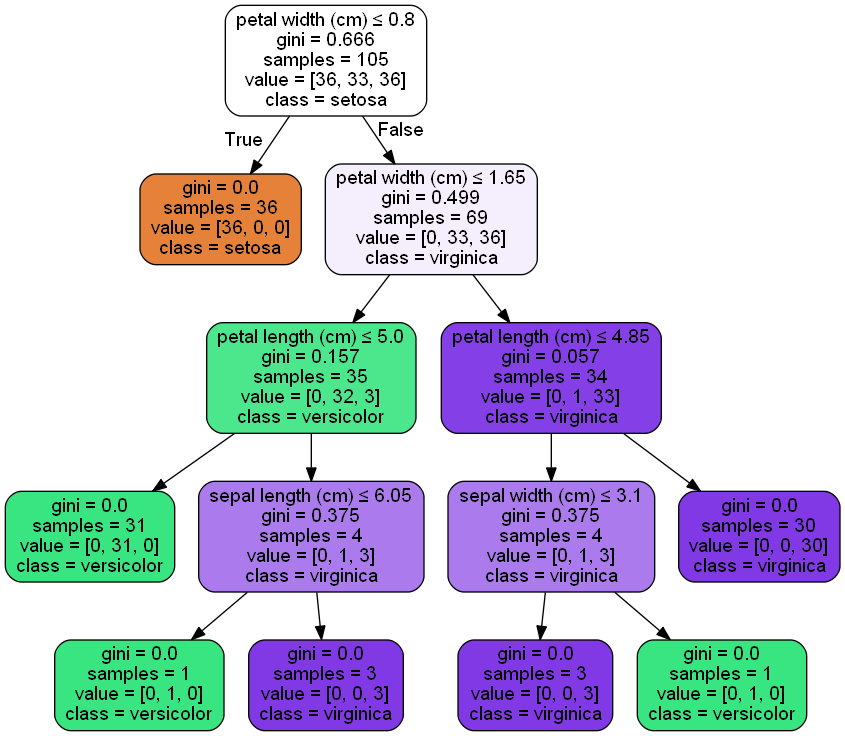

In [20]:
!pip install pydotplus
from sklearn.tree import export_graphviz
#from sklearn.externals.six import StringIO  
from six import StringIO
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = data.feature_names,class_names=data.target_names)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [21]:
gini_node_1 = 1 - pow(36/105, 2) - pow (33/105, 2) -pow(36/105,2)
print( round( gini_node_1, 6) ) 

0.666122
